# <h1><center>Higgs Boson Classification</center></h1>
## Part-1
### Data Observation and pre-processing

For data observation and preprocessing, we will need to call all the necessary librariesneeded for this project.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import cuml
import cudf
import cupy
from cuml.metrics.accuracy import accuracy_score
from cuml.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')

Read the CSV file containg the features related to the Higgs boson particle discovery.

In [2]:
df = cudf.read_csv('./Partical.csv')

In [3]:
df.head()

,1.000000000000000000e+00,8.692932128906250000e-01,-6.350818276405334473e-01,2.256902605295181274e-01,3.274700641632080078e-01,-6.899932026863098145e-01,7.542022466659545898e-01,-2.485731393098831177e-01,-1.092063903808593750e+00,0.000000000000000000e+00,...,-1.045456994324922562e-02,-4.576716944575309753e-02,3.101961374282836914e+00,1.353760004043579102e+00,9.795631170272827148e-01,9.780761599540710449e-01,9.200048446655273438e-01,7.216574549674987793e-01,9.887509346008300781e-01,8.766783475875854492e-01
0,1.0,0.907542,0.329147,0.359412,1.497970,-0.313010,1.095531,-0.557525,-1.588230,2.173076,...,-1.138930,-0.000819,0.000000,0.302220,0.833048,0.985700,0.978098,0.779732,0.992356,0.798343
1,1.0,0.798835,1.470639,-1.635975,0.453773,0.425629,1.104875,1.282322,1.381664,0.000000,...,1.128848,0.900461,0.000000,0.909753,1.108330,0.985692,0.951331,0.803252,0.865924,0.780118
2,0.0,1.344385,-0.876626,0.935913,1.992050,0.882454,1.786066,-1.646778,-0.942383,0.000000,...,-0.678379,-1.360356,0.000000,0.946652,1.028704,0.998656,0.728281,0.869200,1.026736,0.957904
3,1.0,1.105009,0.321356,1.522401,0.882808,-1.205349,0.681466,-1.070464,-0.921871,0.000000,...,-0.373566,0.113041,0.000000,0.755856,1.361057,0.986610,0.838085,1.133295,0.872245,0.808487
4,0.0,1.595839,-0.607811,0.007075,1.818450,-0.111906,0.847550,-0.566437,1.581239,2.173076,...,-0.654227,-1.274345,3.101961,0.823761,0.938191,0.971758,0.789176,0.430553,0.961357,0.957818


As observable, we do not have the name of the features available in the CSV file, but these names are available in the provided documentation with the dataset. We will create a list of these feature names and than name the columns off the dataset using these names for the sake of identification and convenience.

In [4]:
# Column names in a list
names = ['class_label', 'lepton_pT', 'lepton_eta', 'lepton_phi',
'missing_energy_magnitude', 'missing_energy_phi',
'jet_1_pt', 'jet_1_eta', 'jet_1_phi', 'jet_1_b_tag',
'jet_2_pt', 'jet_2_eta', 'jet_2_phi', 'jet_2_b_tag',
'jet_3_pt', 'jet_3_eta', 'jet_3_phi', 'jet_3_b_tag',
'jet_4_pt', 'jet_4_eta', 'jet_4_phi', 'jet_4_b_tag',
'mjj', 'mjjj', 'mlv', 'mjlv', 'mbb', 'mwbb', 'm_wwbb']

# Add names of the columns in the dataframe
df.columns = names

In [5]:
df.head()

,class_label,lepton_pT,lepton_eta,lepton_phi,missing_energy_magnitude,missing_energy_phi,jet_1_pt,jet_1_eta,jet_1_phi,jet_1_b_tag,...,jet_4_eta,jet_4_phi,jet_4_b_tag,mjj,mjjj,mlv,mjlv,mbb,mwbb,m_wwbb
0,1.0,0.907542,0.329147,0.359412,1.497970,-0.313010,1.095531,-0.557525,-1.588230,2.173076,...,-1.138930,-0.000819,0.000000,0.302220,0.833048,0.985700,0.978098,0.779732,0.992356,0.798343
1,1.0,0.798835,1.470639,-1.635975,0.453773,0.425629,1.104875,1.282322,1.381664,0.000000,...,1.128848,0.900461,0.000000,0.909753,1.108330,0.985692,0.951331,0.803252,0.865924,0.780118
2,0.0,1.344385,-0.876626,0.935913,1.992050,0.882454,1.786066,-1.646778,-0.942383,0.000000,...,-0.678379,-1.360356,0.000000,0.946652,1.028704,0.998656,0.728281,0.869200,1.026736,0.957904
3,1.0,1.105009,0.321356,1.522401,0.882808,-1.205349,0.681466,-1.070464,-0.921871,0.000000,...,-0.373566,0.113041,0.000000,0.755856,1.361057,0.986610,0.838085,1.133295,0.872245,0.808487
4,0.0,1.595839,-0.607811,0.007075,1.818450,-0.111906,0.847550,-0.566437,1.581239,2.173076,...,-0.654227,-1.274345,3.101961,0.823761,0.938191,0.971758,0.789176,0.430553,0.961357,0.957818


After naming all the columns, we can confirm that the dataset has 29 columns out of which 28 are independent features and the first column in the dataset is the target. Their are a total of 10999999 instances available in the dataset.

In [6]:
# print shape of the dataframe
df.shape

(10999999, 29)

We need to make sure that all the instances contain every feature value and none of the values is null. In this case we do not have any null value, so we do not have to delete any row or column from the dataset.

In [7]:
df.isnull().sum()

class_label                 0
lepton_pT                   0
lepton_eta                  0
lepton_phi                  0
missing_energy_magnitude    0
missing_energy_phi          0
jet_1_pt                    0
jet_1_eta                   0
jet_1_phi                   0
jet_1_b_tag                 0
jet_2_pt                    0
jet_2_eta                   0
jet_2_phi                   0
jet_2_b_tag                 0
jet_3_pt                    0
jet_3_eta                   0
jet_3_phi                   0
jet_3_b_tag                 0
jet_4_pt                    0
jet_4_eta                   0
jet_4_phi                   0
jet_4_b_tag                 0
mjj                         0
mjjj                        0
mlv                         0
mjlv                        0
mbb                         0
mwbb                        0
m_wwbb                      0
dtype: uint64

After checking teh null values, we take a look at the number of labels in the dataset. this is a binary classification problem. There are only two labels. A 0 means that the process is a background event, while a 1 means the presence of a signal event. There are about 5.82 million instances with signal events and about 5.17 million instances with background events. This shows that the data is somewhat balanced. If there was an imbalance of 80-20, this would have been a severe case, and we had to either collect more data or use tecchniques like SMOTE to oversample the dataset.

In [8]:
label_count =df.class_label.value_counts()

In [9]:
label_count

1.0    5829122
0.0    5170877
Name: class_label, dtype: int32

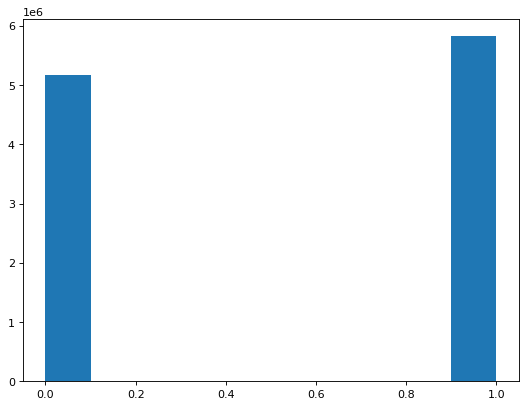

In [10]:
figure(figsize=(8, 6), dpi=80)
plt.hist(df['class_label'])
plt.show()

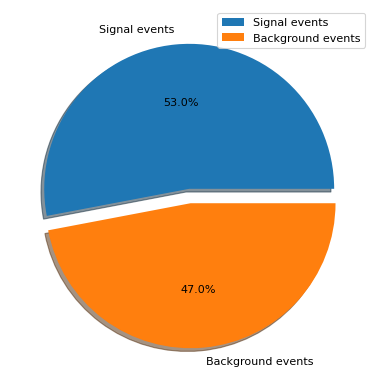

In [11]:
figure(figsize=(8, 6), dpi=80)
y = np.array([label_count[1],label_count[0]])
mylabels = [ "Signal events", "Background events"]
myexplode = [0, 0.1]

plt.pie(y, labels = mylabels, explode = myexplode, shadow = True,autopct='%1.1f%%')
plt.legend(loc='upper right')
plt.show()


The next thing that can be done is to look for correlation in the data values after looking for imbalance. According to a general rule, if there is less correlation between two characteristics, there is more capacity for learning and a lesser likelihood that the model would overfit. Because the model matches the data noise rather than the underlying patterns at greater correlations. Strong correlation could also make it more difficult for the model to separate the effects of various variables. In some cases, dimensionality reduction or feature selection techniques may be helpful for lowering the number of linked features and enhancing model performance. 

<AxesSubplot:>

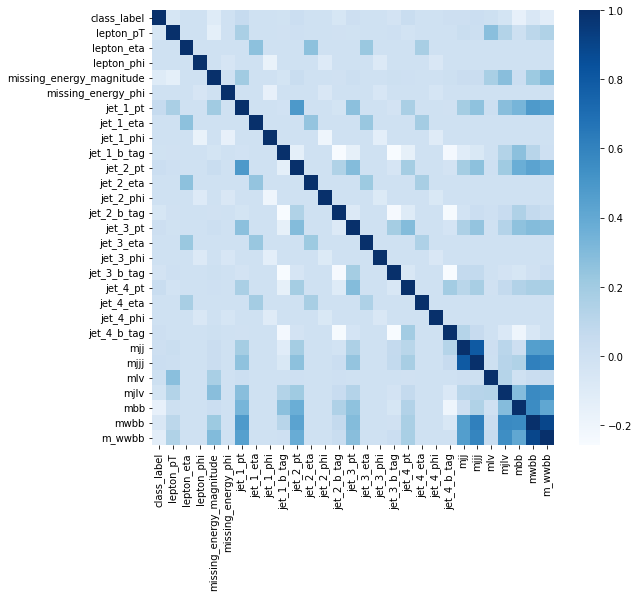

In [12]:
import seaborn as sns
plt.figure(figsize = (9,8))
correlation_matrix = df.corr().to_pandas()
sns.heatmap(correlation_matrix,cmap='Blues')

We can see that there are certain values between the target label column and some attributes that have a negative connection. The virtually white coloured block in the first column serves as a clue. The characteristics mbb, m_wwbb, missing_energy_magnitude, and mwbb exhibit a negative correlation with the class labels, as can be shown if we specifically examine the correlation values between each feature and the target class label.

In certain circumstances, negative correlation is advantageous and reduces the likelihood of overfitting. However, it is crucial to ensure that the negative correlation between the class labels and the features does not negatively effect the performance of our model. We should investigate these aspects in relation to the class labels to make sure that this does not suggest a problem. To do this, we may utilise scatter plots for each of these distinct variables to look for outliers.

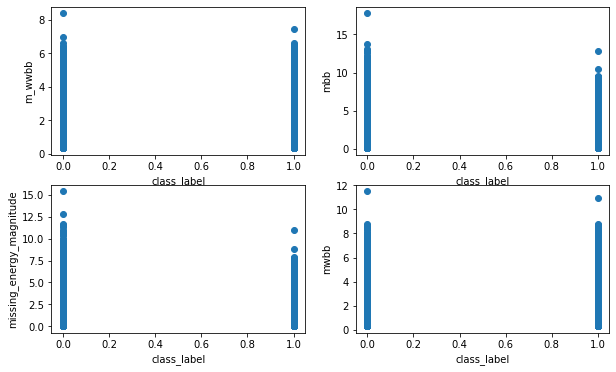

In [13]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize=(10, 6))
ax[0][0].scatter(df['class_label'].to_numpy(), df['m_wwbb'].to_numpy())
ax[0][0].set_xlabel("class_label")
ax[0][0].set_ylabel("m_wwbb")

ax[0][1].scatter(df['class_label'].to_numpy(), df['mbb'].to_numpy())
ax[0][1].set_xlabel("class_label")
ax[0][1].set_ylabel("mbb")

ax[1][0].scatter(df['class_label'].to_numpy(), df['missing_energy_magnitude'].to_numpy())
ax[1][0].set_xlabel("class_label")
ax[1][0].set_ylabel("missing_energy_magnitude")

ax[1][1].scatter(df['class_label'].to_numpy(), df['mwbb'].to_numpy())
ax[1][1].set_xlabel("class_label")
ax[1][1].set_ylabel("mwbb")
plt.show()

We might claim that the outliers make the negative correlation noticeable. This can be explained by the fact that outliers make the connection weaker and the data look more erratic. As the dispersion is decreased, removing the outliers can boost the correlation between two characteristics.


### Splitting the dataset

It is essential to divide the data into train and test subsets before preprocessing it. Preprocessing the entire dataset would be viewed as biassing the test and as providing the model with information about the test set. The dataset being examined is enormous. An effective technique to divide this kind of data set is to construct an 80-20 split, where 80% of the data is utilised for the training set and the remaining 20% is used for testing. This split of the data is also regarded as a norm in the field. We can just call the train_test_split module from the pre-processing library as we are using the CuML module. 


In [6]:
feature_names = ['lepton_pT', 'lepton_eta', 'lepton_phi',
'missing_energy_magnitude', 'missing_energy_phi',
'jet_1_pt', 'jet_1_eta', 'jet_1_phi', 'jet_1_b_tag',
'jet_2_pt', 'jet_2_eta', 'jet_2_phi', 'jet_2_b_tag',
'jet_3_pt', 'jet_3_eta', 'jet_3_phi', 'jet_3_b_tag',
'jet_4_pt', 'jet_4_eta', 'jet_4_phi', 'jet_4_b_tag',
'mjj', 'mjjj', 'mlv', 'mjlv', 'mbb', 'mwbb', 'm_wwbb']

In [7]:
X, y = df[feature_names], df['class_label']

In [8]:
from cuml.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

#### Scaling the dataset

Before training the model on our data we need to scale it. The learning method can be substantially more dominated and influenced by characteristics with bigger magnitudes than by features with smaller magnitudes. We can ensure that no one feature dominates the learning process by scaling the data to bring all the characteristics to a similar scale. Scaling data can also hasten the convergence of optimisation methods, particularly gradient descent-based ones. The optimisation method must take smaller steps for large-scale features and greater steps for small-scale features when features are scaled differently. The algorithm's convergence may take longer as a result.

Standard Scaler and Min-Max Scaler are two common methods used for scaling data in machine learning.
The main difference between the two scalers is the scaling range. The Standard Scaler scales the data to have a mean of 0 and a standard deviation of 1, which means that the scaled data will have negative and positive values. On the other hand, the Min-Max Scaler scales the data to a fixed range of [0,1], which means that all the values will be between 0 and 1.

In [9]:
from cuml.experimental.preprocessing import StandardScaler

In [10]:
# initialise standard scaler object
scaler = StandardScaler()
# fit method compute the mean and std to be used for later scaling
scaler.fit(X_train)

StandardScaler()

In [11]:
# transforms the data by centering and scaling
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Dimentionality reduction

#### Principal Component Analysis - PCA

Principal Component Analysis (PCA) is a technique used to reduce the dimensionality of a large dataset by identifying patterns and correlations in the data. Large datasets can have a large number of features, making them complex and difficult to analyze. PCA can reduce the number of features in the data, making it more manageable and easier to analyze. With large datasets, the computational cost of analyzing all the features can be very high. By reducing the number of features with PCA, the computation time can be significantly reduced.

In [11]:
from cuml.decomposition import PCA as PCA_GPU
# I am keeping n_components as 2, so that I can visualize it in a 2D plot. Usually it should be kept a low number.
pca = PCA_GPU(n_components=3)

In [12]:
pca.fit(X_train_scaled)
components = pca.transform(X_train_scaled)
components.head()

,0,1,2
0,-1.275467,-1.125928,0.023437
1,-0.562054,0.035371,0.402426
2,-1.340258,-1.374681,-1.012950
3,-0.762340,3.315296,1.476324
4,1.535364,0.382025,0.369220


Explained variance ratio is a term used in Principal Component Analysis (PCA) that refers to the proportion of the total variance in the data that is explained by each principal component (PC). Each principal component represents a linear combination of the original features, and they are sorted in order of the amount of variance they explain in the data. The first principal component explains the most variance, followed by the second, third, and so on.

In [22]:
pca.explained_variance_ratio_

0    0.148732
1    0.066592
2    0.064345
dtype: float64

we can also see this using a graph were the first pca has most contribution towards the information related to the dataset and third has the least.

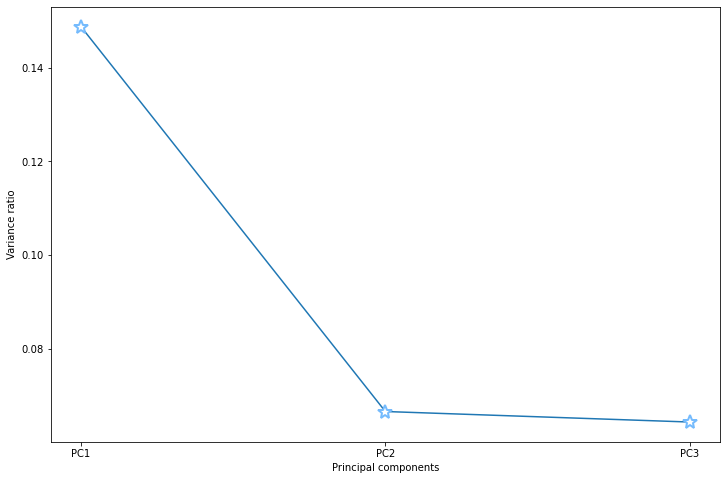

In [23]:
plt.figure(figsize = (12,8))
plt.plot(pca.explained_variance_ratio_.values_host)
plt.plot(['PC1','PC2','PC3'],pca.explained_variance_ratio_.values_host,'*',markersize=15, linewidth=4,
         markerfacecolor='white',
         markeredgecolor='xkcd:sky blue',
         markeredgewidth=2)
plt.xlabel('Principal components')
plt.ylabel('Variance ratio')
plt.show()

### Chi-squared
Chi-squared can be used as a feature selection technique to reduce the dimensionality of big data. The basic idea is to identify the most informative features that are most strongly associated with the target variable. The procedure involves calculating the chi-squared statistic for each feature in the dataset, which measures the association between the feature and the target variable. Features that have a high chi-squared statistic are considered to be more informative and are more strongly associated with the target variable. By selecting only the most informative features based on the chi-squared test, the dimensionality of the data can be reduced without losing too much information. This can be especially useful when working with big data, where the number of features can be very large and computationally expensive to process.

In [24]:
from sklearn.feature_selection import chi2
from cuml.experimental.preprocessing import MinMaxScaler

In [25]:
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(X_train)
X_train_min_max = min_max_scaler.transform(X_train)

In [26]:
chi2_result = chi2(X_train_min_max.values_host, y_train.values_host)

In [27]:
chi2_result[0]

array([7.87283653e+02, 1.88937210e-02, 4.99342562e-01, 2.06460763e+03,
       3.41604253e-01, 7.64166715e+02, 1.28572090e-02, 1.49160549e-01,
       4.17985732e+02, 1.12818638e+02, 1.59004386e-02, 7.49714504e-01,
       1.09603667e+04, 4.52843485e+01, 6.09421745e-02, 1.60638018e-02,
       2.76840922e+03, 4.27854677e+02, 1.04972414e-01, 3.11369636e-01,
       1.25946817e+03, 2.10564432e+01, 6.13213700e+01, 3.63707825e+00,
       1.11459187e+02, 3.42991804e+03, 6.40749604e+02, 2.92729515e+03])

In [28]:
Chi_df=pd.DataFrame(columns=['feature','Chi_2_score'])
Chi_df['feature']=feature_names
Chi_df['Chi_2_score']=chi2_result[0]

<AxesSubplot:xlabel='Features', ylabel='Chi 2 Score'>

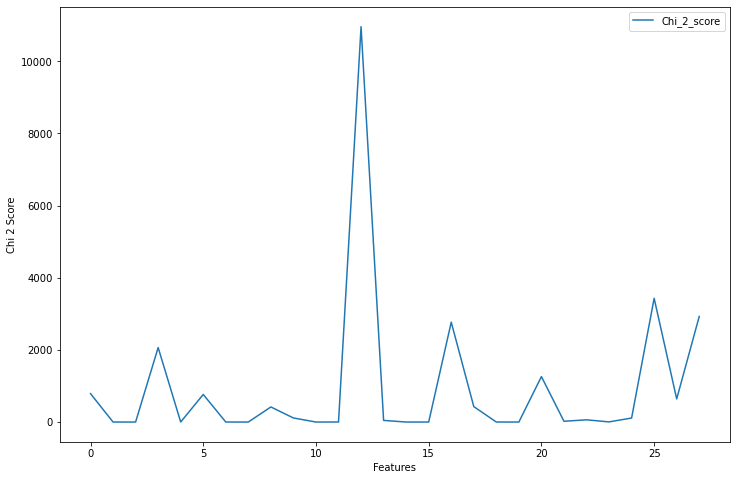

In [29]:
Chi_df.plot(xlabel='Features',ylabel='Chi 2 Score',figsize=(12,8))

In [30]:
chi2_stats = zip(feature_names, chi2_result[0])
chi2_sorted = sorted(chi2_stats, key=lambda x: x[1], reverse=True)
chi2_sorted

[('jet_2_b_tag', 10960.366677214222),
 ('mbb', 3429.9180409927303),
 ('m_wwbb', 2927.2951470515036),
 ('jet_3_b_tag', 2768.409222229812),
 ('missing_energy_magnitude', 2064.607626692266),
 ('jet_4_b_tag', 1259.4681748444377),
 ('lepton_pT', 787.2836527089869),
 ('jet_1_pt', 764.1667147516711),
 ('mwbb', 640.7496043384228),
 ('jet_4_pt', 427.8546771143566),
 ('jet_1_b_tag', 417.9857318876435),
 ('jet_2_pt', 112.81863773672038),
 ('mjlv', 111.45918700691678),
 ('mjjj', 61.32137003406504),
 ('jet_3_pt', 45.28434845221287),
 ('mjj', 21.056443208184064),
 ('mlv', 3.6370782460522295),
 ('jet_2_phi', 0.7497145038400133),
 ('lepton_phi', 0.4993425620155102),
 ('missing_energy_phi', 0.3416042527341157),
 ('jet_4_phi', 0.31136963647676486),
 ('jet_1_phi', 0.1491605492352981),
 ('jet_4_eta', 0.10497241385543993),
 ('jet_3_eta', 0.060942174464635686),
 ('lepton_eta', 0.01889372096723719),
 ('jet_3_phi', 0.0160638018178879),
 ('jet_2_eta', 0.015900438588904834),
 ('jet_1_eta', 0.012857209019739652)

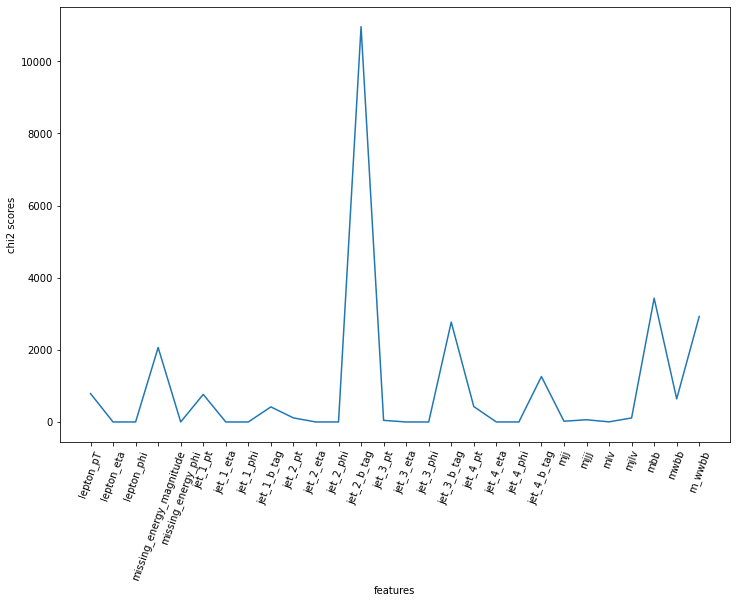

In [31]:
plt.figure(figsize=(12,8))
plt.plot(feature_names,chi2_result[0])
plt.xticks(rotation=70)
plt.xlabel('features')
plt.ylabel('chi2 scores')
plt.show()

# <h1><center>Higgs Boson Classification</center></h1>
## Part-2
### Model training

After splitting and scaling the data we are ready to train our models. The models we are going to use in this task are from cuML library as they support GPU for traing and testing the models. We will be using Random forest model and XGBost model, and train these on our complete dataset as well as the dimentionality reduced set and observe the difference in the performance of the models. We will try to tune our models by changing the hyper parameters too.

In [37]:
#Import the RandomForest classifier from cuML library
from cuml.ensemble import RandomForestClassifier as cuRF

For our first random forest model we will be using a the default hyper parameters and below is the description of the hyperparameters that we are going to use in our model. 

1- **n_estimators:** The number of trees in the forest. Increasing this number typically improves the performance of the classifier, but also increases computation time.

2- **max_depth:** The maximum depth of each tree in the forest. This parameter controls the complexity of the trees, and increasing it can lead to overfitting.

3- **n_bins:** The number of bins used when splitting continuous features. A higher number of bins can lead to better accuracy, but also increases computation time.

4- **n_streams:** The number of parallel streams used to build the trees. This parameter can be set to the number of available GPU streams for faster computation.

5- **max_samples:** The maximum percentage of samples used to build each tree. This parameter controls the amount of randomness in the forest, and setting it to 1 means that all samples are used to build each tree.

6- **split_criterion:** The criterion used to select the best feature to split on at each node. A value of 0 indicates the Gini impurity criterion, while a value of 1 indicates the entropy criterion.

7- **random_state:** The random seed used for reproducibility.

In [11]:
# Default Random Forest params for our first model
cu_rf_params = {
    'n_estimators'    : 100,
    'max_depth'       : 16,
    'n_bins'          : 128,
    'n_streams'       : 4,
    'max_samples'     : 1,
    'split_criterion' : 0,
    'random_state'    : 123
}
cu_rf = cuRF(**cu_rf_params)

CuML was a possibility for this strategy since we wanted to leverage GPU to improve performance and cut down on processing time. We'll clock our training session as well to keep track of the time. Using the scaled training set, we will train our model.

In [12]:
%%time

cu_rf.fit(X_train_scaled, y_train)

CPU times: user 1min 35s, sys: 254 ms, total: 1min 35s
Wall time: 26.6 s


RandomForestClassifier()

The trained model is applied to the test data set using the predict function from the random forest library to provide predictions.

In [14]:
%%time

# using the predict method on test set
y_pred = cu_rf.predict(X_test_scaled)

CPU times: user 2min 57s, sys: 172 ms, total: 2min 57s
Wall time: 2min 57s


We can determine how many of the test predictions were accurate by comparing them to the actual outcomes. Utilising the accuracy score function, this may be determined.

In [15]:
print('Accuracy score: ', accuracy_score(y_test, y_pred))

Accuracy score:  0.7331298589706421


This model's accuracy of 73% is not dismal. To test if changing the hyperparameters boosts perforance, we may undertake hyperparameter tuning.

### Hyper-parameter tuning

Our model was previously trained using default parameters; however, we may now change the parameters to see whether we obtain any useful results. 

Increasing the number of bins in the Random Forest model can improve its ability to capture nonlinear relationships between the features and the target variable, as it allows for more granular splitting of the data. However, this can also increase the risk of overfitting, especially if the data is noisy or the number of samples is small.

Increasing the max depth of the trees in the Random Forest model can improve its ability to capture complex interactions between the features and the target variable. However, it can also increase the risk of overfitting, especially if the data is noisy or the number of samples is small.

Increasing the number of estimators in the Random Forest model can improve its ability to generalize to new data by reducing the variance of the model. However, this improvement in performance may come at the cost of increased computational complexity and longer training time.

We can also change the random state so that model can try to train on a different distribution of data.

In [12]:
# cuml Random Forest params
cu_rf_params_2 = {
    'n_estimators'   : 500, # increased from 100 to 500
    'max_depth'      : 20,  # changed from 16 to 20
    'n_bins'         : 150, # increased the bins from 128 to 150
    'n_streams'      : 4,   # default
    'max_samples'    : 1,   # default
    'split_criterion': 0,   # default
    'random_state'   : 786  # Changed the Random Number Generator seed to try different distribution
}
cu_rf_2 = cuRF(**cu_rf_params_2)

In [13]:
%%time

trained_model=cu_rf_2.fit(X_train_scaled, y_train)

CPU times: user 9min 19s, sys: 2.5 s, total: 9min 21s
Wall time: 2min 34s


In [39]:
%%time

y_pred_2 = cu_rf_2.predict(X_test_scaled)

CPU times: user 25min 17s, sys: 1.47 s, total: 25min 18s
Wall time: 25min 17s


In [40]:
print('Accuracy score: ', accuracy_score(y_test, y_pred_2))

Accuracy score:  0.7444262504577637


We can observe that altering the hyperparameter values does, to a certain extent, boost efficacy. albeit at the cost of 22 more minutes during the testing process.
To evaluate whether the performance changes, let's try a different random seed.

In [42]:
%%time
# cuml Random Forest params
cu_rf_params_3 = {
    'n_estimators'   : 600, # increase no. of trees to 500
    'max_depth'      : 20,  # change to 16
    'n_bins'         : 180, # change to 128
    'n_streams'      : 4,   # CUDA stream to use for parallel processing on GPU, default is 4
    'max_samples'    : 1,   # Percentage of input data to be considered for each tree, default is 1
    'split_criterion': 0,   # Split algorithm, default is 0 for gini impurity
    'random_state'   : 72   # Seed used for Random Number Generator
}
cu_rf_3 = cuRF(**cu_rf_params_3)
cu_rf_3.fit(X_train_scaled, y_train)

CPU times: user 11min 8s, sys: 2.71 s, total: 11min 11s
Wall time: 3min 16s


RandomForestClassifier()

In [43]:
%%time
y_pred_3 = cu_rf_3.predict(X_test_scaled)

CPU times: user 31min 48s, sys: 1.14 s, total: 31min 49s
Wall time: 31min 48s


In [44]:
print('Accuracy score: ', accuracy_score(y_test, y_pred_3))

Accuracy score:  0.7445030808448792


The accuracy is almost same as the second experiment and we can assume that without any further processing we would not be able to make any drastic change in the accuracy of the model..

In [ ]:
from joblib import dump
dump( trained_model, 'RF.model')

### Train Random Forest with PCA components

Now let's train the random forest algorithm with the PCA components and see the effect on the performance. 

In [15]:
cu_rf_params_pca = {
    'n_estimators'    : 500, 
    'max_depth'       : 20, 
    'n_bins'          : 150, 
    'n_streams'       : 4, 
    'max_samples'     : 1, 
    'split_criterion' : 0, 
    'random_state'    : 786
}
# initailise RF object
cu_rf_PCA = cuRF(**cu_rf_params_pca)

Fit the PCA components

In [16]:
%%time

cu_rf_PCA.fit(components, y_train)

CPU times: user 5min 58s, sys: 1.14 s, total: 5min 59s
Wall time: 1min 38s


RandomForestClassifier()

Due to the lower amount of features, the training takes less time. To make predictions using the test set, we will also need to convert it into pca components.

In [17]:
X_test_PCA = pca.transform(X_test_scaled)
X_test_PCA.head()

,0,1,2
0,-0.087741,-0.217690,-0.298753
1,0.532698,2.316275,-0.554948
2,-1.379118,-1.403355,1.917520
3,0.948131,0.459213,1.628539
4,2.381529,1.415918,-1.045559


On the test set produced using PCA, the .predict() function will be used to get the predictions.

In [18]:
%%time
# using the predict method on test set
pred_pca = cu_rf_PCA.predict(X_test_PCA)

CPU times: user 18min 38s, sys: 541 ms, total: 18min 38s
Wall time: 18min 37s


In [19]:
print('Accuracy score: ', accuracy_score(y_test, pred_pca))

Accuracy score:  0.580947995185852


The accuracy has decreased by using the PCA components. Random Forests works better with more number of dimensions and has the ability to perform better parallel computing. 

## XGBoost

Extreme Gradient Boosting, or XGBoost, is a potent supervised machine learning technique. The most potent algorithms in traditional machine learning are Random Forest and XGBoost, which produce cutting-edge results comparable to those of neural networks. For GPU training, XGBoost with RAPIDS can be utilised. Additionally, XGBoost parallelizes well and trains on large datasets well. 

In [12]:
import xgboost as xgb

In XGBoost, a DMatrix is a data structure that is used to represent the input data for training or prediction. It is essentially a memory-optimized format that is designed to efficiently store and access large datasets, and it is used by the XGBoost library for training and predicting with gradient boosting models.

The DMatrix format is designed to handle both dense and sparse data, and it supports a variety of input formats. When creating a DMatrix, you typically provide the input data along with any associated labels or weights that are required for training or prediction.

The DMatrix format allows for efficient memory usage by storing only the non-zero elements of sparse data, and by using a compressed sparse column (CSC) representation to access this data quickly during training. For dense data, the DMatrix format stores the data in a contiguous block of memory, which can be efficiently accessed during training using SIMD instructions.

Once a DMatrix has been created, it can be used to train an XGBoost model using the xgboost.train() function or to make predictions using the xgboost.predict() function. The DMatrix format provides a convenient way to handle large datasets efficiently in XGBoost, which can be especially important when working with high-dimensional data or when training on a large number of samples.

#### Converting cuDF data to DMatrix format:

Our data is in a cuDF dataframe. we need to convert it to a DMatrix object for GPU optimized XGBoost model.

In [13]:
%%time

d_train = xgb.DMatrix(X_train_scaled, label=y_train)
d_validation = xgb.DMatrix(X_test_scaled, label=y_test)

CPU times: user 109 ms, sys: 37.6 ms, total: 146 ms
Wall time: 184 ms


We need to set the parameters for the XGBoost model now.

In [14]:
#  the parameters for the model
params = {
    #we are not putting any parameters as we just want tio run the model on the default values.
}

# general params
general_params = {'silent': 1} # for verbosity
params.update(general_params)

# booster params
n_gpus = 1  
booster_params = {}

if n_gpus != 0:
    booster_params['tree_method'] = 'gpu_hist'
    booster_params['n_gpus'] = n_gpus   
params.update(booster_params)

# learning task params
learning_task_params = {}
learning_task_params['eval_metric'] = 'auc'
learning_task_params['objective'] = 'binary:logistic'
    
params.update(learning_task_params)
print(params)

{'silent': 1, 'tree_method': 'gpu_hist', 'n_gpus': 1, 'eval_metric': 'auc', 'objective': 'binary:logistic'}


Above code instantiates an XGBoost model by specifying various parameters that control its behavior.

The **params** dictionary is used to store the parameters for the model. The first set of parameters are general_params, which includes a single parameter to control the verbosity of the model output.

The **booster_params** dictionary contains parameters that are specific to the XGBoost booster, which is the algorithm that is used to build the model. The n_gpus variable controls whether the model will be trained on a GPU or CPU. If **n_gpus** is set to a value greater than 0, then the tree_method parameter is set to 'gpu_hist' and the n_gpus parameter is set to the number of GPUs to use. If n_gpus is set to 0, then the model will be trained on the CPU.

The **learning_task_params** dictionary contains parameters that are specific to the learning task, such as the evaluation metric and the objective function. In this case, the evaluation metric is set to 'auc', which is the area under the ROC curve, and the objective function is set to 'binary:logistic', which is used for binary classification problems.

Finally, the **params** dictionary is updated with the values from general_params, booster_params, and learning_task_params, and the resulting dictionary is printed to the console. This dictionary can then be used to create an instance of the XGBoost model and to train or make predictions with it.

**eval_list** is typically a list of tuples, where each tuple contains a string specifying the evaluation metric to use, and a DMatrix object containing the validation data.

In XGBoost, **num_round** refers to the number of boosting rounds to perform during training. Each boosting round corresponds to adding a new tree to the ensemble model. The purpose of num_round is to control the complexity of the model and to prevent overfitting to the training data.

Setting num_round too low may result in underfitting, where the model is too simple to capture the patterns in the data. On the other hand, setting num_round too high may result in overfitting, where the model becomes too complex and fits the noise in the training data, resulting in poor generalization performance on new, unseen data.

Therefore, num_round should be chosen based on a trade-off between model complexity and generalization performance. Typically, a large value of num_round is chosen and then early stopping is used to prevent overfitting. Early stopping involves monitoring the performance of the model on a validation set after each boosting round, and stopping the training process when the performance on the validation set no longer improves.

In [15]:
eval_list = [(d_validation, 'validation'), (d_train, 'train')]
num_round = 100

In [22]:
%%time

model = xgb.train(params, d_train, num_round, eval_list)

[22:23:59] WARNING: /opt/conda/envs/rapids/conda-bld/xgboost_1639022671260/work/src/learner.cc:576: 
Parameters: { "n_gpus", "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation-auc:0.74269	train-auc:0.74290
[1]	validation-auc:0.75468	train-auc:0.75489
[2]	validation-auc:0.76418	train-auc:0.76437
[3]	validation-auc:0.76987	train-auc:0.77006
[4]	validation-auc:0.77461	train-auc:0.77488
[5]	validation-auc:0.77925	train-auc:0.77950
[6]	validation-auc:0.78417	train-auc:0.78443
[7]	validation-auc:0.78715	train-auc:0.78743
[8]	validation-auc:0.78967	train-auc:0.78994
[9]	validation-auc:0.79127	train-auc:0.79161
[10]	validation-auc:0.79349	train-auc:0.79384
[11]	validation-auc:0.79480	train-auc:0.79515
[12]	validation-auc:0.79607	train-

In [24]:
model_pred = model.predict(d_validation)

By default, the predictions made by XGBoost are probabilities. To calculate the accuracy score, we can round them to the nearest 0 or 1, then convert them to binary class values.

In [25]:
model_predictions = [round(value) for value in model_pred]
model_predictions = np.array(model_predictions)

In [26]:
print('Accuracy score: ', accuracy_score(y_test, model_predictions))

Accuracy score:  0.7417985200881958


We can observe that the accuracy of RFC and XGBoost is not much different. We may experiment with other hyperparameters to see if the accuracy improves.
An ROC AUC score, which is a better approach to assess the performance of the model, is simple to find with XGBoost.

In [27]:
print('ROC AUC score: ', roc_auc_score(y_test, model_pred))

ROC AUC score:  0.8233003616333008


AUC score of 82% is a good score for this model.

##### lets try changeing the hyperparameters a bit to see if it makes any difference

1-  **silent**:1 : Sets the verbosity of XGBoost to silent mode, meaning that no messages will be printed to the console during training.

2-  **tree_method**:**gpu_hist**: Specifies the tree construction method to use during training. In this case,   **gpu_hist** indicates that the GPU histogram algorithm should be used for improved training speed.

3-  **n_gpus**: -1: Specifies the number of GPUs to use during training. A value of -1 indicates that all available GPUs should be used.

4-  **eval_metric**:**auc**: Specifies the evaluation metric to use during training. In this case,   **auc** indicates that the area under the receiver operating characteristic curve (AUC-ROC) should be used as the evaluation metric.

5-  **objective**:**binary:logistic**: Specifies the objective function to optimize during training. In this case,   **binary:logistic** indicates that binary logistic regression should be used.

5-  **max_depth**:15 : Specifies the maximum depth of each decision tree in the ensemble model. Increasing this value can increase the model complexity, but may also increase the risk of overfitting.

6-  **reg_lambda**:5 : Specifies the L2 regularization parameter for the weights of the decision tree. Increasing this value can help prevent overfitting by penalizing large weights.

7-  **scale_pos_weight**:2 : Specifies the scaling factor for the positive class in binary classification problems. This can be useful for imbalanced datasets where one class has many more samples than the other.

8-  **gamma**:1: Specifies the minimum loss reduction required to make a further partition on a leaf node of the tree. Increasing this value can help prevent overfitting by reducing the number of splits in the tree.



In [28]:
params_2 = {
    'silent': 1,
    'tree_method': 'gpu_hist',
    'n_gpus': -1,
    'eval_metric': 'auc', 
    'objective': 'binary:logistic',
    'max_depth': 15,
    'reg_lambda': 5,
    'scale_pos_weight': 2, 
    'gamma': 1
}

In [35]:
%%time

model_2 = xgb.train(params_2, d_train, num_round, eval_list)

[22:27:26] WARNING: /opt/conda/envs/rapids/conda-bld/xgboost_1639022671260/work/src/learner.cc:576: 
Parameters: { "n_gpus", "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation-auc:0.79511	train-auc:0.80975
[1]	validation-auc:0.80457	train-auc:0.82164
[2]	validation-auc:0.81000	train-auc:0.82940
[3]	validation-auc:0.81359	train-auc:0.83514
[4]	validation-auc:0.81645	train-auc:0.84004
[5]	validation-auc:0.81880	train-auc:0.84426
[6]	validation-auc:0.82090	train-auc:0.84860
[7]	validation-auc:0.82270	train-auc:0.85209
[8]	validation-auc:0.82432	train-auc:0.85544
[9]	validation-auc:0.82571	train-auc:0.85867
[10]	validation-auc:0.82715	train-auc:0.86210
[11]	validation-auc:0.82820	train-auc:0.86471
[12]	validation-auc:0.82919	train-

In [36]:
model_pred_2 = model_2.predict(d_validation)

In [37]:
model_predictions_2 = [round(value) for value in model_pred_2]
model_predictions_2 = np.array(model_predictions_2)

In [38]:
print('Accuracy score: ', accuracy_score(y_test, model_predictions_2))

Accuracy score:  0.7475994229316711


In [39]:
print('ROC AUC score: ', roc_auc_score(y_test, model_pred_2))

ROC AUC score:  0.8440521955490112


Looking at the accuracy and AUC score show that model performance is increased a bit but not much. We might need to do further processing of the data to get more accurate results.

### XGBoost with PCA componenets

Lets try PCA components for XGBoost model training.

In [22]:
d_train_pca = xgb.DMatrix(components, label=y_train)
d_validation_pca = xgb.DMatrix(X_test_PCA, label=y_test)

In [23]:
# model training settings
eval_list_pca = [(d_validation_pca, 'validation'), (d_train_pca, 'train')]

In [28]:
num_round=100

In [29]:
%%time

best_pca = xgb.train(params, d_train_pca, num_round, eval_list_pca)

[23:46:51] WARNING: /opt/conda/envs/rapids/conda-bld/xgboost_1639022671260/work/src/learner.cc:576: 
Parameters: { "n_gpus", "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation-auc:0.59148	train-auc:0.59152
[1]	validation-auc:0.59339	train-auc:0.59339
[2]	validation-auc:0.59469	train-auc:0.59471
[3]	validation-auc:0.59666	train-auc:0.59664
[4]	validation-auc:0.59694	train-auc:0.59695
[5]	validation-auc:0.59748	train-auc:0.59748
[6]	validation-auc:0.59782	train-auc:0.59784
[7]	validation-auc:0.59794	train-auc:0.59798
[8]	validation-auc:0.59805	train-auc:0.59810
[9]	validation-auc:0.59833	train-auc:0.59840
[10]	validation-auc:0.59837	train-auc:0.59846
[11]	validation-auc:0.59847	train-auc:0.59859
[12]	validation-auc:0.59857	train-

In [31]:
pred_pca = best_pca.predict(d_validation_pca)

In [32]:
print('ROC AUC score: ', roc_auc_score(y_test, pred_pca))

ROC AUC score:  0.5986874103546143


XGBoost with PCA gave similar results to the RFC model with PCA components and we need to consider more preprocessing or increae the number of pca components.